In [34]:
import pandas as pd
import os

CLINICAL_PATH = "../../datasets/clinical_data"

 # Clinical data analysis
 
These XML files contain clinical data for breast cancer (BRCA) patients from the TCGA project. Each file represents a single patient and includes:

- Patient information (age, death, vital status).
- Tumor characteristics (histology, stage).
- Treatment details and follow-up data.

### Explore columns of clinical TXT files

In [35]:
import pickle

def import_txt(file_path):
    df = pd.read_csv(file_path, sep="\t")
    print(f"\nTXT file {file_path}. \nCOLUMNS: {df.columns}")
    columns_to_select = df.columns[df.columns.str.contains('age|year|days|case|time', case=False)]
    print(f"COLUMNS with 'age|year|days|case|time': {columns_to_select}")

def import_parce(file_path):
    with open(file_path, "rb") as f:
        data = pickle.load(f)
    print(f"\nFile TXT PARCEL {file_path}: {data}")

count = 0
for subfolder in os.listdir(CLINICAL_PATH):
    for file in os.listdir(f"{CLINICAL_PATH}/{subfolder}"):
        if file == "logs":
            for f in os.listdir(f"{CLINICAL_PATH}/{subfolder}/{file}"):
                if f.endswith(".parcel"):
                    import_parce(f"{CLINICAL_PATH}/{subfolder}/{file}/{f}")
        elif file.endswith(".txt"):
            import_txt(f"{CLINICAL_PATH}/{subfolder}/{file}")
            if file != "annotations.txt":
                count += 1
count


TXT file ../../datasets/clinical_data/051ca785-e7be-4ac3-8757-1c9ace8acf7e/annotations.txt. 
COLUMNS: Index(['id', 'submitter_id', 'entity_type', 'entity_id', 'category',
       'classification', 'created_datetime', 'status', 'notes'],
      dtype='object')
COLUMNS with 'age|year|days|case|time': Index(['created_datetime'], dtype='object')

File TXT PARCEL ../../datasets/clinical_data/051ca785-e7be-4ac3-8757-1c9ace8acf7e/logs/nationwidechildrens.org_clinical.TCGA-A8-A08F.xml.parcel: IntervalTree([Interval(0, 84541, {'md5sum': 'f31cca8e42209358a8f3039ee72559bb'})])

TXT file ../../datasets/clinical_data/07488c2c-c50f-402e-8f22-9278db6110f9/annotations.txt. 
COLUMNS: Index(['id', 'submitter_id', 'entity_type', 'entity_id', 'category',
       'classification', 'created_datetime', 'status', 'notes'],
      dtype='object')
COLUMNS with 'age|year|days|case|time': Index(['created_datetime'], dtype='object')

File TXT PARCEL ../../datasets/clinical_data/07488c2c-c50f-402e-8f22-9278db6110f9/lo

9

**Structures of files discarded for our analysis:**
- Annotations TXT files. 
    - COLUMNS: `Index(['id', 'submitter_id', 'entity_type', 'entity_id', 'category',
           'classification', 'created_datetime', 'status', 'notes'],
          dtype='object')`
    - COLUMNS with 'age|year|days|case': `Index(['id', 'submitter_id', 'entity_type', 'entity_id', 'category',
           'classification', 'created_datetime', 'status', 'notes'],
          dtype='object')`
- org_clinical_omf_v4 TXT files. 
    - COLUMNS: `Index(['bcr_patient_uuid', 'bcr_patient_barcode', 'bcr_omf_barcode',
           'bcr_omf_uuid', 'form_completion_date', 'malignancy_type',
           'other_malignancy_dx_days_to', 'surgery_indicator',
           'other_malignancy_surgery_type', 'other_malignancy_surgery_days_to',
           'pharmaceutical_therapy_indicator', 'pharmaceutical_therapy_extent',
           'pharmaceutical_therapy_drug_name', 'pharmaceutical_tx_started_days_to',
           'radiation_therapy_indicator', 'radiation_therapy_extent',
           'history_rt_tx_to_site_of_tcga_tumor',
           'radiation_therapy_started_days_to', 'ajcc_staging_edition',
           'ajcc_tumor_pathologic_pt', 'ajcc_nodes_pathologic_pn',
           'ajcc_metastasis_pathologic_pm', 'ajcc_pathologic_tumor_stage',
           'clinical_stage', 'other_malignancy_anatomic_site',
           'other_malignancy_anatomic_site_text',
           'other_malignancy_histological_type',
           'other_malignancy_histological_type_text',
           'other_malignancy_laterality', 'stage_other'],
          dtype='object')`
    - COLUMNS with 'age|year|days|case': `Index(['other_malignancy_dx_days_to', 'other_malignancy_surgery_days_to',
       'pharmaceutical_tx_started_days_to', 'radiation_therapy_started_days_to', 'ajcc_pathologic_tumor_stage',
       'clinical_stage', 'stage_other'],
      dtype='object')`
- org_clinical_follow_up_v* TXT files:
    - COLUMNS: `Index(['bcr_patient_uuid', 'bcr_patient_barcode', 'bcr_followup_barcode',
       'bcr_followup_uuid', 'form_completion_date',
       'radiation_treatment_adjuvant', 'pharmaceutical_tx_adjuvant',
       'tumor_status', 'vital_status', 'last_contact_days_to', 'death_days_to',
       'new_tumor_event_dx_indicator', 'new_tumor_event_type',
       'new_tumor_event_site', 'new_tumor_event_site_other', 'new_tumor_event_dx_days_to', 'new_tumor_event_radiation_tx',
       'new_tumor_event_pharmaceutical_tx', 'new_tumor_event_surgery_days_to', 'nte_er_status',
       'nte_er_status_ihc__positive', 'nte_er_positivity_scale_used', 'nte_er_ihc_intensity_score', 'nte_pr_positivity_scale_used'
       'nte_er_positivity_other_scale', 'nte_er_positivity_define_method',
       'nte_pr_status_by_ihc', 'nte_pr_status_ihc__positive',
       'nte_pr_ihc_intensity_score', 'nte_pr_positivity_other_scale',
       'nte_pr_positivity_define_method', 'nte_her2_status',
       'nte_her2_status_ihc__positive', 'nte_her2_positivity_ihc_score',
       'nte_her2_positivity_other_scale', 'nte_her2_positivity_method',
       'nte_her2_fish_status', 'nte_her2_signal_number',
       'nte_cent_17_signal_number', 'her2_cent17_counted_cells_count',
       'nte_cent_17_her2_ratio', 'nte_cent17_her2_other_scale',
       'nte_her2_fish_define_method', 'cent17_copy_number',
       'days_to_additional_surgery_locoregional_procedure',
       'days_to_additional_surgery_metastatic_procedure',
       'days_to_last_known_alive', 'er_ihc_score', 'er_positivity_method',
       'er_positivity_scale_other', 'er_status_by_ihc',
       'er_status_ihc_Percent_Positive', 'her2_and_cent17_cells_count',
       'her2_and_cent17_scale_other', 'her2_cent17_ratio', 'her2_copy_number',
       'her2_fish_method', 'her2_fish_status', 'her2_ihc_percent_positive',
       'her2_ihc_score', 'her2_positivity_method_text',
       'her2_positivity_scale_other', 'her2_status_by_ihc',
       'new_tumor_event_surgery', 'new_tumor_event_surgery_met',
       'pr_positivity_define_method', 'pr_positivity_ihc_intensity_score',
       'pr_positivity_scale_other', 'pr_status_by_ihc',
       'pr_status_ihc_percent_positive', 'followup_reason'],
      dtype='object')`
    - COLUMNS with 'age|year|days|case': `Index(['last_contact_days_to', 'death_days_to', 'new_tumor_event_dx_days_to',
       'days_to_additional_surgery_locoregional_procedure',
       'days_to_additional_surgery_metastatic_procedure',
       'days_to_last_known_alive'],
      dtype='object')`
- org_clinical_radiation_brca TXT files: 
    - COLUMNS: `Index(['bcr_patient_uuid', 'bcr_patient_barcode', 'bcr_radiation_barcode',
       'bcr_radiation_uuid', 'form_completion_date', 'radiation_therapy_type',
       'radiation_therapy_site', 'radiation_total_dose',
       'radiation_adjuvant_units', 'radiation_adjuvant_fractions_total',
       'radiation_therapy_started_days_to',
       'radiation_therapy_ongoing_indicator',
       'radiation_therapy_ended_days_to', 'treatment_best_response',
       'course_number', 'radiation_type_other', 'therapy_regimen',
       'therapy_regimen_other'],
      dtype='object')`
    - COLUMNS with 'age|year|days|case': `Index(['radiation_therapy_started_days_to', 'radiation_therapy_ended_days_to'], dtype='object')`
- org_clinical_drug_brca TXT files:
    - COLUMNS: `Index(['bcr_patient_uuid', 'bcr_patient_barcode', 'bcr_drug_barcode',
       'bcr_drug_uuid', 'form_completion_date',
       'pharmaceutical_therapy_drug_name',
       'clinical_trial_drug_classification', 'pharmaceutical_therapy_type',
       'pharmaceutical_tx_started_days_to',
       'pharmaceutical_tx_ongoing_indicator',
       'pharmaceutical_tx_ended_days_to', 'treatment_best_response',
       'days_to_stem_cell_transplantation', 'pharm_regimen',
       'pharm_regimen_other', 'pharma_adjuvant_cycles_count',
       'pharma_type_other', 'pharmaceutical_tx_dose_units',
       'pharmaceutical_tx_total_dose_units', 'prescribed_dose',
       'regimen_number', 'route_of_administration',
       'stem_cell_transplantation', 'stem_cell_transplantation_type',
       'therapy_regimen', 'therapy_regimen_other', 'total_dose',
       'tx_on_clinical_trial'],
      dtype='object')`
    - COLUMNS with 'age|year|days|case': `Index(['pharmaceutical_tx_started_days_to', 'pharmaceutical_tx_ended_days_to',
       'days_to_stem_cell_transplantation'],
      dtype='object')`
- org_clinical_patient|nte_brca TXT files:
    - COLUMNS:  `Index([
        'bcr_patient_uuid', 'bcr_patient_barcode', 'new_tumor_event_type',
        'new_tumor_event_site', 'new_tumor_event_site_other',
        'new_tumor_event_dx_days_to', 'new_tumor_event_surgery',
        'new_tumor_event_surgery_days_to', 'new_tumor_event_radiation_tx',
        'new_tumor_event_pharmaceutical_tx', 'nte_er_status',
        'nte_er_status_ihc__positive', 'nte_er_positivity_scale_used',
        'nte_er_ihc_intensity_score', 'nte_er_positivity_other_scale',
        'nte_er_positivity_define_method', 'nte_pr_status_by_ihc',
        'nte_pr_status_ihc__positive', 'nte_pr_positivity_scale_used',
        'nte_pr_ihc_intensity_score', 'nte_pr_positivity_other_scale',
        'nte_pr_positivity_define_method', 'nte_her2_status',
        'nte_her2_status_ihc__positive', 'nte_her2_positivity_ihc_score',
        'nte_her2_positivity_other_scale', 'nte_her2_positivity_method',
        'nte_her2_fish_status', 'nte_her2_signal_number',
        'nte_cent_17_signal_number', 'her2_cent17_counted_cells_count',
        'nte_cent_17_her2_ratio', 'nte_cent17_her2_other_scale',
        'nte_her2_fish_define_method'
    ], dtype='object')`
    - COLUMNS with 'age|year|days|case|time': `Index([
            'new_tumor_event_dx_days_to',
            'new_tumor_event_surgery_days_to'
        ], dtype='object')`
- org_* TXT PARCEL files: `IntervalTree([Interval(0, 62088, {'md5sum': '1bad711cda0e80562749634e250e6fa1'})])`

## Count clinical XML files:

In [36]:
def import_xml(file_path):
    df = pd.read_xml(file_path, parser="etree")
    if 'days_to_birth' in df.columns and 'age_at_initial_pathologic_diagnosis' in df.columns:
        print(f"File {file_path}: OK.")
        return 0
    else:
        print(f"File {file_path}: Not contains required columns.")
        return 1

subfolders_count = 0
count_xml=0
count_txt=0
count_no=0
count_xml_omf = 0
for subfolder in os.listdir(CLINICAL_PATH):
    subfolders_count += 1
    for file in os.listdir(f"{CLINICAL_PATH}/{subfolder}"):
        if file.endswith(".xml"):
            count_xml += 1
            count_xml_omf += import_xml(f"{CLINICAL_PATH}/{subfolder}/{file}")
        elif file == "annotations.txt":
            pass
        elif file.endswith(".txt"):
            count_txt += 1
            #import_txt(f"{CLINICAL_PATH}/{subfolder}/{file}")
        else:
            count_no += 1

print("\n------------------------------------------------")
print(f"-> Number of xml files found: {count_xml}")
print(f"\t-> Number of 'omf' xml files found: {count_xml_omf}")
print(f"-> Number of txt files found: {count_txt}")
print(f"-> Number of non-xml and non-txt files found: {count_no}")
print(f"-> Total subfolders: {subfolders_count}")
print("------------------------------------------------")

File ../../datasets/clinical_data/00049989-fa21-48fb-8dda-710c0dd5932e/nationwidechildrens.org_clinical.TCGA-A2-A0CT.xml: OK.
File ../../datasets/clinical_data/004b6bd4-19d0-4b40-99ef-1a76313fe7a5/nationwidechildrens.org_clinical.TCGA-GM-A2DD.xml: OK.
File ../../datasets/clinical_data/00a5e81c-cd67-483f-9d99-3c733b2ead38/nationwidechildrens.org_clinical.TCGA-D8-A1JM.xml: OK.
File ../../datasets/clinical_data/014f5ae1-5862-4165-9a3b-bba7bb08a527/nationwidechildrens.org_clinical.TCGA-C8-A12P.xml: OK.
File ../../datasets/clinical_data/01a962ea-a87f-49fa-9a27-7273a39f64a9/nationwidechildrens.org_clinical.TCGA-S3-A6ZF.xml: OK.
File ../../datasets/clinical_data/021d8f80-3db0-4f60-b404-a71e115102ca/nationwidechildrens.org_clinical.TCGA-BH-A18K.xml: OK.
File ../../datasets/clinical_data/024bde93-ff69-4d1f-b301-c053e8c594f5/nationwidechildrens.org_omf.TCGA-A1-A0SP.xml: Not contains required columns.
File ../../datasets/clinical_data/02726df0-5db3-4b3d-a3ca-8a1d8a0e130e/nationwidechildrens.org_c

Previous output:
```python
    ------------------------------------------------
    -> Number of xml files found: 818
        -> Number of 'omf' xml files found: 47
    -> Number of txt files found: 9
    -> Number of non-xml and non-txt files found: 0
    -> Total subfolders: 827
    ------------------------------------------------
```


**OMF files**
The OMF (Other Malignancy Form) files keep clinical information and do not contain laboratory or transcriptomic data, such as mRNA or RNA-Seq.

### Explore columns of clinical XML files

#### See an example of **org_clinical** XML file:

In [37]:
file_path = f"{CLINICAL_PATH}/0a9561ad-0d8e-4776-be26-c9d7b2825045/nationwidechildrens.org_clinical.TCGA-B6-A0IG.xml"
temp_df = pd.read_xml(file_path, parser="etree")
pd.set_option('display.max_colwidth', None)
temp_df.describe()

,day_of_dcc_upload,month_of_dcc_upload,year_of_dcc_upload,program,dbgap_registration_code,additional_studies,tumor_tissue_site_other,days_to_birth,days_to_last_known_alive,days_to_death,...,her2_neu_breast_carcinoma_copy_analysis_input_total_number,breast_carcinoma_immunohistochemistry_progesterone_receptor_pos_finding_scale,breast_carcinoma_immunohistochemistry_pos_cell_score,postoperative_rx_tx,radiation_therapy,day_of_form_completion,month_of_form_completion,year_of_form_completion,drugs,radiations
count,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
mean,22.0,12.0,2016.0,NaN,NaN,NaN,NaN,-18433.0,NaN,4456.0,...,NaN,NaN,NaN,NaN,NaN,2.0,11.0,2010.0,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,22.0,12.0,2016.0,NaN,NaN,NaN,NaN,-18433.0,NaN,4456.0,...,NaN,NaN,NaN,NaN,NaN,2.0,11.0,2010.0,NaN,NaN
25%,22.0,12.0,2016.0,NaN,NaN,NaN,NaN,-18433.0,NaN,4456.0,...,NaN,NaN,NaN,NaN,NaN,2.0,11.0,2010.0,NaN,NaN
50%,22.0,12.0,2016.0,NaN,NaN,NaN,NaN,-18433.0,NaN,4456.0,...,NaN,NaN,NaN,NaN,NaN,2.0,11.0,2010.0,NaN,NaN
75%,22.0,12.0,2016.0,NaN,NaN,NaN,NaN,-18433.0,NaN,4456.0,...,NaN,NaN,NaN,NaN,NaN,2.0,11.0,2010.0,NaN,NaN
max,22.0,12.0,2016.0,NaN,NaN,NaN,NaN,-18433.0,NaN,4456.0,...,NaN,NaN,NaN,NaN,NaN,2.0,11.0,2010.0,NaN,NaN


In [38]:
file_path = f"{CLINICAL_PATH}/ffb2e9d9-07dd-48dd-9c37-9f87c28b5b2c/nationwidechildrens.org_clinical.TCGA-E2-A1LK.xml"
temp_df = pd.read_xml(file_path, parser="etree")
columns_to_select = temp_df.columns[temp_df.columns.str.contains('age|year|days|case|time', case=False)]
print(f"COLUMNS of a xml file, with 'age|year|days|case':\n\t{columns_to_select}")

COLUMNS of a xml file, with 'age|year|days|case':
	Index(['year_of_dcc_upload', 'days_to_birth', 'days_to_last_known_alive',
       'days_to_death', 'days_to_last_followup',
       'days_to_initial_pathologic_diagnosis',
       'age_at_initial_pathologic_diagnosis',
       'year_of_initial_pathologic_diagnosis',
       'axillary_lymph_node_stage_method_type',
       'axillary_lymph_node_stage_other_method_descriptive_text',
       'er_level_cell_percentage_category', 'stage_event',
       'year_of_form_completion'],
      dtype='object')


#### See an example of org_omf XML file:

In [39]:
file_path = f"{CLINICAL_PATH}/ff679dd3-62be-4332-8157-0a83ffb8516a/nationwidechildrens.org_omf.TCGA-AQ-A54O.xml"
temp_df = pd.read_xml(file_path, parser="etree")
print(f"COLUMNS of an 'omf' xml file:\n\t{temp_df.columns}")

COLUMNS of an 'omf' xml file:
	Index(['bcr', 'file_uuid', 'batch_number', 'project_code', 'disease_code',
       'day_of_dcc_upload', 'month_of_dcc_upload', 'year_of_dcc_upload',
       'patient_withdrawal', 'program', 'dbgap_registration_code',
       'additional_studies', 'tissue_source_site', 'patient_id',
       'bcr_patient_barcode', 'bcr_patient_uuid', 'omfs'],
      dtype='object')


We can see that in the omf files there is no information about age or days to birth, so we will discard these files for our analysis.

## Check matching between 'days_to_birth' and 'age_at_initial_pathologic_diagnosis' columns:

In [40]:
FLAG = True

def check_age_days(file_path):
    temp_df = pd.read_xml(file_path, parser="etree")

    if 'days_to_birth' in temp_df.columns and 'age_at_initial_pathologic_diagnosis' in temp_df.columns:
        temp_df = temp_df[["days_to_birth", "age_at_initial_pathologic_diagnosis"]]
        temp_df = temp_df.dropna(how='all')

        rows_with_nan = temp_df[temp_df.isna().any(axis=1)]
        if rows_with_nan.empty:
            # Convert days_to_birth to years
            temp_df.loc[:, "days_to_birth"] = -(temp_df["days_to_birth"]) / 365
            temp_df["days_to_birth"] = temp_df["days_to_birth"].astype(int)

            if abs(temp_df.iloc[0]["days_to_birth"] - temp_df.iloc[0]["age_at_initial_pathologic_diagnosis"]) > 1:
                print(f"{temp_df.iloc[0]['days_to_birth']} != {temp_df.iloc[0]['age_at_initial_pathologic_diagnosis']}")
                FLAG = False
            else:
                print(f"{temp_df.iloc[0]['days_to_birth']} == {temp_df.iloc[0]['age_at_initial_pathologic_diagnosis']}")

for subfolder in os.listdir(CLINICAL_PATH):
    for file in os.listdir(f"{CLINICAL_PATH}/{subfolder}"):
        if file.endswith(".xml"):
            check_age_days(f"{CLINICAL_PATH}/{subfolder}/{file}")
            
if FLAG is False:
    print("\n-> Some age_at_initial_pathologic_diagnosis & days_to_birth mismatches found.")
else:
    print("\n-> All age_at_initial_pathologic_diagnosis & days_to_birth match.")

71.0 == 71.0
53.0 == 53.0
59.0 == 59.0
55.0 == 55.0
64.0 == 64.0
46.0 == 46.0
67.0 == 67.0
62.0 == 62.0
62.0 == 62.0
65.0 == 65.0
32.0 == 32.0
36.0 == 36.0
81.0 == 81.0
53.0 == 53.0
59.0 == 59.0
86.0 == 86.0
56.0 == 56.0
55.0 == 55.0
58.0 == 58.0
74.0 == 73.0
66.0 == 66.0
61.0 == 61.0
51.0 == 51.0
47.0 == 47.0
47.0 == 47.0
39.0 == 39.0
57.0 == 57.0
50.0 == 50.0
66.0 == 66.0
47.0 == 47.0
53.0 == 53.0
50.0 == 50.0
72.0 == 72.0
45.0 == 45.0
52.0 == 52.0
51.0 == 51.0
66.0 == 66.0
56.0 == 56.0
65.0 == 65.0
55.0 == 55.0
47.0 == 47.0
63.0 == 63.0
51.0 == 51.0
55.0 == 55.0
40.0 == 40.0
83.0 == 83.0
52.0 == 52.0
60.0 == 60.0
65.0 == 65.0
67.0 == 67.0
48.0 == 47.0
58.0 == 58.0
55.0 == 54.0
58.0 == 58.0
48.0 == 48.0
67.0 == 67.0
63.0 == 63.0
83.0 == 83.0
47.0 == 47.0
34.0 == 34.0
59.0 == 59.0
40.0 == 40.0
40.0 == 40.0
43.0 == 43.0
34.0 == 34.0
63.0 == 63.0
69.0 == 69.0
81.0 == 81.0
49.0 == 49.0
46.0 == 46.0
41.0 == 41.0
42.0 == 42.0
64.0 == 64.0
61.0 == 61.0
40.0 == 40.0
61.0 == 61.0
79.0 == 79.0

We can rely on 'age_at_initial_pathologic_diagnosis' only, as 'days_to_birth' and 'age_at_initial_pathologic_diagnosis' match in all files.

## About Labs and Hostpitals

The next code block is only used to explore the XML structure and tags.

In [41]:
import xml.etree.ElementTree as ET
file_path = f"{CLINICAL_PATH}/0a9561ad-0d8e-4776-be26-c9d7b2825045/nationwidechildrens.org_clinical.TCGA-B6-A0IG.xml"
tree = ET.parse(file_path)
root = tree.getroot()
print(root.tag)
for elem in root.iter():
    print(elem.tag)

{http://tcga.nci/bcr/xml/clinical/brca/2.7}tcga_bcr
{http://tcga.nci/bcr/xml/clinical/brca/2.7}tcga_bcr
{http://tcga.nci/bcr/xml/administration/2.7}admin
{http://tcga.nci/bcr/xml/administration/2.7}bcr
{http://tcga.nci/bcr/xml/administration/2.7}file_uuid
{http://tcga.nci/bcr/xml/administration/2.7}batch_number
{http://tcga.nci/bcr/xml/administration/2.7}project_code
{http://tcga.nci/bcr/xml/administration/2.7}disease_code
{http://tcga.nci/bcr/xml/administration/2.7}day_of_dcc_upload
{http://tcga.nci/bcr/xml/administration/2.7}month_of_dcc_upload
{http://tcga.nci/bcr/xml/administration/2.7}year_of_dcc_upload
{http://tcga.nci/bcr/xml/administration/2.7}patient_withdrawal
{http://tcga.nci/bcr/xml/administration/2.7}withdrawn
{http://tcga.nci/bcr/xml/administration/2.7}program
{http://tcga.nci/bcr/xml/administration/2.7}dbgap_registration_code
{http://tcga.nci/bcr/xml/clinical/brca/2.7}patient
{http://tcga.nci/bcr/xml/administration/2.7}additional_studies
{http://tcga.nci/bcr/xml/clinical

### Collect columns from clinical XML files

We want extract the following columns from the XML clinical files:
- `tissue_source_site`: Tissue Source Site code
- `bcr`: Biospecimen Core Resource code
- `days_to_birth`: Days to birth (negative value)
- `days_to_death`: Days to death
- `vital_status`: Alive/Dead
- `patient_barcode`: Patient barcode
- `pathologic_stage`: Pathologic stage of the tumor

In [42]:
import xml.etree.ElementTree as ET

def import_xml(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
            
    ns = {
        'admin': 'http://tcga.nci/bcr/xml/administration/2.7',
        'shared': 'http://tcga.nci/bcr/xml/shared/2.7',
        'clin_shared': 'http://tcga.nci/bcr/xml/clinical/shared/2.7',
        'stage': 'http://tcga.nci/bcr/xml/clinical/shared/stage/2.7'
    }
            
    tss = root.find('.//shared:tissue_source_site', ns).text
    bcr = root.find('.//admin:bcr', ns).text
    
    birth_elem = root.find('.//clin_shared:days_to_birth', ns)
    days_to_birth = int(birth_elem.text) if (birth_elem is not None and birth_elem.text) else None
    death_elem = root.find('.//clin_shared:days_to_death', ns)
    days_to_death = int(death_elem.text) if (death_elem is not None and death_elem.text) else None
    
    vital_status = root.find('.//clin_shared:vital_status', ns).text
    patient_barcode = root.find('.//shared:bcr_patient_barcode', ns).text    
    
    pathologic_stage_elem = root.find('.//stage:pathologic_stage', ns)
    pathologic_stage = pathologic_stage_elem.text if (pathologic_stage_elem is not None and pathologic_stage_elem.text) else None
        
    records.append({'file': file_path, 'tissue_source_site': tss, 'bcr': bcr, 'days_to_birth': days_to_birth, 'days_to_death': days_to_death, 'vital_status': vital_status, 'patient_barcode': patient_barcode, 'pathologic_stage': pathologic_stage})

records = []

for subfolder in os.listdir(f"{CLINICAL_PATH}"):
        file_xml_or_annotation_or_orm = 0
        for file in os.listdir(f"{CLINICAL_PATH}/{subfolder}"):
            if file.endswith(".xml") and "annotations" not in file and "org_omf" not in file:
                selected_data = import_xml(f"{CLINICAL_PATH}/{subfolder}/{file}")                

clinical_df = pd.DataFrame(records)
clinical_df = clinical_df.dropna(how='all')

print(clinical_df.head())

                                                                                                                  file  \
0  ../../datasets/clinical_data/00049989-fa21-48fb-8dda-710c0dd5932e/nationwidechildrens.org_clinical.TCGA-A2-A0CT.xml   
1  ../../datasets/clinical_data/004b6bd4-19d0-4b40-99ef-1a76313fe7a5/nationwidechildrens.org_clinical.TCGA-GM-A2DD.xml   
2  ../../datasets/clinical_data/00a5e81c-cd67-483f-9d99-3c733b2ead38/nationwidechildrens.org_clinical.TCGA-D8-A1JM.xml   
3  ../../datasets/clinical_data/014f5ae1-5862-4165-9a3b-bba7bb08a527/nationwidechildrens.org_clinical.TCGA-C8-A12P.xml   
4  ../../datasets/clinical_data/01a962ea-a87f-49fa-9a27-7273a39f64a9/nationwidechildrens.org_clinical.TCGA-S3-A6ZF.xml   

  tissue_source_site                             bcr  days_to_birth  \
0                 A2  Nationwide Children's Hospital       -25959.0   
1                 GM  Nationwide Children's Hospital       -19415.0   
2                 D8  Nationwide Children's Hospital  

In [43]:
clinical_df.isnull().sum()

file                    0
tissue_source_site      0
bcr                     0
days_to_birth          10
days_to_death         696
vital_status            0
patient_barcode         0
pathologic_stage        8
dtype: int64

We can see that some files are missing values for `days_to_birth`, `days_to_death` and `pathologic_stage`.
In particular, `days_to_birth` is missing in 10 files that we will drop for our analysis.

In [44]:
clinical_df = clinical_df.dropna(subset=['days_to_birth'])
clinical_df.shape

(761, 8)

### Tissue source site

In [45]:
clinical_df[['tissue_source_site']].value_counts()

tissue_source_site
BH                    117
A2                     75
E2                     73
A8                     70
D8                     56
AR                     46
B6                     40
AN                     38
E9                     36
AO                     32
C8                     31
EW                     26
A7                     25
OL                     16
AC                     14
LL                     13
GM                     13
A1                     10
S3                      9
AQ                      8
3C                      3
PL                      3
GI                      2
LD                      2
UL                      1
UU                      1
V7                      1
Name: count, dtype: int64

You can find the meaning of Tissue Source Site codes at: [gdc.cancer.gov - tissue source site codes](https://gdc.cancer.gov/resources-tcga-users/tcga-code-tables/tissue-source-site-codes)

Our tissue source sites:

| TSS Code | Source Site                  | Study Name                | BCR  |
|----------|------------------------------|---------------------------|------|
| BH       | University of Pittsburgh     | Breast invasive carcinoma | NCH  |
| A2       | Walter Reed                  | Breast invasive carcinoma | NCH  |
| E2       | Roswell Park                 | Breast invasive carcinoma | NCH  |
| A8       | Indivumed                    | Breast invasive carcinoma | NCH  |
| D8       | Greater Poland Cancer Center | Breast invasive carcinoma | NCH  |
| AR       | Mayo                         | Breast invasive carcinoma | NCH  |
| B6       | Duke                         | Breast invasive carcinoma | NCH  |
| AN       | Cureline                     | Breast invasive carcinoma | NCH  |
| E9       | Asterand                     | Breast invasive carcinoma | NCH  |
| AO       | MSKCC                        | Breast invasive carcinoma | NCH  |
| C8       | ILSBio                       | Breast invasive carcinoma | NCH  |

In [46]:
clinical_df[['tissue_source_site']]

,tissue_source_site
0,A2
1,GM
2,D8
3,C8
4,S3
...,...
766,A8
767,AC
768,E9
769,AR


In [47]:
clinical_df[['bcr']].value_counts()

bcr                           
Nationwide Children's Hospital    761
Name: count, dtype: int64

So all rows have **BCR = NCH** (Nationwide Children's Hospital).

### Check days_to_death and vital_status consistency

In [48]:
clinical_df[(clinical_df['vital_status'] == 'Dead') & (clinical_df['days_to_death'].isna())]

,file,tissue_source_site,bcr,days_to_birth,days_to_death,vital_status,patient_barcode,pathologic_stage


So all deaths have a value for `days_to_death`.

In [49]:
clinical_df[(clinical_df['vital_status'] == 'Alive') & (clinical_df['days_to_death'].notna())]

,file,tissue_source_site,bcr,days_to_birth,days_to_death,vital_status,patient_barcode,pathologic_stage


We checked that no alive patient has a value for `days_to_death`.

## Check: patient represented more than once?

In [50]:
clinical_df[clinical_df['patient_barcode'].duplicated(keep=False)]

,file,tissue_source_site,bcr,days_to_birth,days_to_death,vital_status,patient_barcode,pathologic_stage


Vediamo che non abbiamo più file clinici per lo stesso patiente_barcode, quindi ogni paziente è rappresentato una sola volta.

# Plot Alive/Dead

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

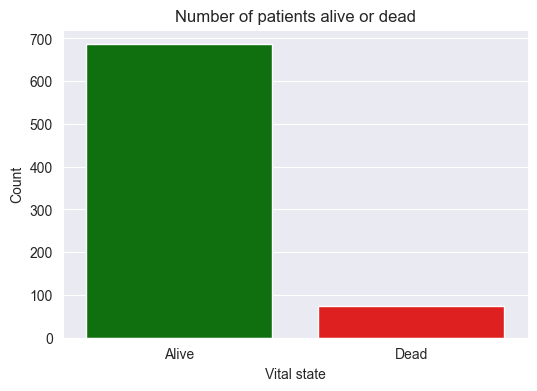

In [52]:
status_counts = clinical_df['vital_status'].value_counts().reset_index()
status_counts.columns = ['vital_status', 'count']

plt.figure(figsize=(6,4))
sns.barplot(data=status_counts, x='vital_status', y='count', hue='vital_status', palette={'Alive':'green','Dead':'red'}, dodge=False)
plt.title('Number of patients alive or dead')
plt.ylabel('Count')
plt.xlabel('Vital state')
plt.show()

In [53]:
clinical_df['age'] = (-clinical_df['days_to_birth'].astype(float) / 365).astype(int)

bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 99, 120]
labels = ['0-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','100+']

clinical_df['age_group'] = pd.cut(clinical_df['age'], bins=bins, labels=labels, right=True)

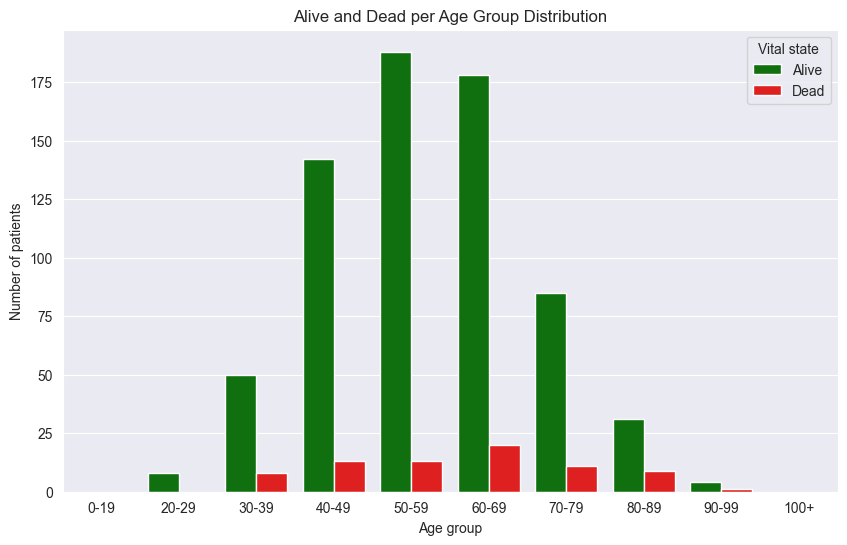

In [54]:
age_status_counts = clinical_df.groupby(['age_group', 'vital_status'], observed=True).size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.barplot(data=age_status_counts, x='age_group', y='count', hue='vital_status', palette=['green','red'])
plt.title('Alive and Dead per Age Group Distribution')
plt.xlabel('Age group')
plt.ylabel('Number of patients')
plt.legend(title='Vital state')
plt.show()

### Plot stage vs age

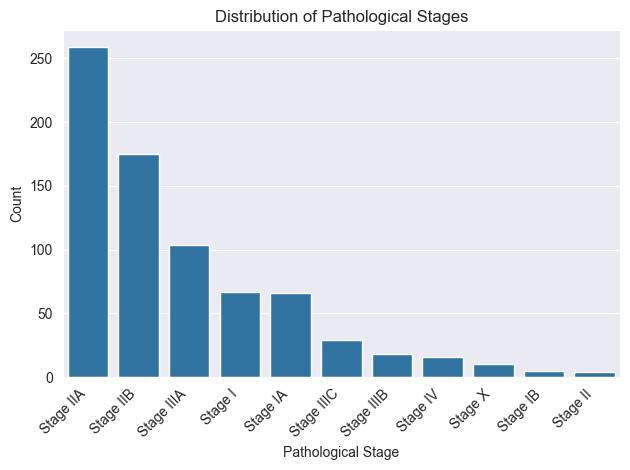

In [57]:
sns.countplot(
    x='pathologic_stage', 
    data=clinical_df, 
    order=clinical_df['pathologic_stage'].value_counts().index
)
plt.title("Distribution of Pathological Stages")
plt.xlabel("Pathological Stage")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Followup Analysis

In [58]:
import pickle

def import_txt(file_path):
    df = pd.read_csv(file_path, sep="\t")    
    columns_to_select = df.columns[df.columns.str.contains('followup', case=False)]
    print(f"COLUMNS with 'followup': {columns_to_select}")

for subfolder in os.listdir(CLINICAL_PATH):
    for file in os.listdir(f"{CLINICAL_PATH}/{subfolder}"):
        if file.endswith(".txt"):
            import_txt(f"{CLINICAL_PATH}/{subfolder}/{file}")
            if file != "annotations.txt":
                import_txt(f"{CLINICAL_PATH}/{subfolder}/{file}")

COLUMNS with 'followup': Index([], dtype='object')
COLUMNS with 'followup': Index([], dtype='object')
COLUMNS with 'followup': Index([], dtype='object')
COLUMNS with 'followup': Index([], dtype='object')
COLUMNS with 'followup': Index([], dtype='object')
COLUMNS with 'followup': Index([], dtype='object')
COLUMNS with 'followup': Index([], dtype='object')
COLUMNS with 'followup': Index([], dtype='object')
COLUMNS with 'followup': Index([], dtype='object')
COLUMNS with 'followup': Index([], dtype='object')
COLUMNS with 'followup': Index([], dtype='object')
COLUMNS with 'followup': Index([], dtype='object')
COLUMNS with 'followup': Index(['bcr_followup_barcode', 'bcr_followup_uuid'], dtype='object')
COLUMNS with 'followup': Index(['bcr_followup_barcode', 'bcr_followup_uuid'], dtype='object')
COLUMNS with 'followup': Index([], dtype='object')
COLUMNS with 'followup': Index([], dtype='object')
COLUMNS with 'followup': Index([], dtype='object')
COLUMNS with 'followup': Index([], dtype='objec

In [59]:
count = 0
def import_xml(file_path):
    df = pd.read_xml(file_path, parser="etree")
    columns_to_select = df.columns[df.columns.str.contains('follow', case=False)]
    print(f"COLUMNS with 'followup': {columns_to_select}")
    if 'days_to_last_followup' in df.columns:
        if not df['days_to_last_followup'].isna().all():
            return 1
    return 0

for subfolder in os.listdir(CLINICAL_PATH):
    for file in os.listdir(f"{CLINICAL_PATH}/{subfolder}"):
        if file.endswith(".xml"):
            count += import_xml(f"{CLINICAL_PATH}/{subfolder}/{file}")
            
count

COLUMNS with 'followup': Index(['days_to_last_followup', 'follow_ups'], dtype='object')
COLUMNS with 'followup': Index(['days_to_last_followup', 'follow_ups'], dtype='object')
COLUMNS with 'followup': Index(['days_to_last_followup', 'follow_ups'], dtype='object')
COLUMNS with 'followup': Index(['days_to_last_followup', 'follow_ups'], dtype='object')
COLUMNS with 'followup': Index(['days_to_last_followup', 'follow_ups'], dtype='object')
COLUMNS with 'followup': Index(['days_to_last_followup', 'follow_ups'], dtype='object')
COLUMNS with 'followup': Index([], dtype='object')
COLUMNS with 'followup': Index(['days_to_last_followup', 'follow_ups'], dtype='object')
COLUMNS with 'followup': Index(['days_to_last_followup', 'follow_ups'], dtype='object')
COLUMNS with 'followup': Index(['days_to_last_followup', 'follow_ups'], dtype='object')
COLUMNS with 'followup': Index(['days_to_last_followup', 'follow_ups'], dtype='object')
COLUMNS with 'followup': Index(['days_to_last_followup', 'follow_ups'

696

In [60]:
def import_xml(file_path):
    df = pd.read_xml(file_path, parser="etree")
    if 'days_to_last_followup' in df.columns:
        return df
    return None

filtered_dfs = []

for subfolder in os.listdir(CLINICAL_PATH):
    for file in os.listdir(f"{CLINICAL_PATH}/{subfolder}"):
        if file.endswith(".xml"):
            filtered_df = import_xml(f"{CLINICAL_PATH}/{subfolder}/{file}")
            if filtered_df is not None:
                filtered_dfs.append(filtered_df)

# Concatenate all filtered dataframes into one
followup_df = pd.concat(filtered_dfs, ignore_index=True)
followup_df = followup_df.dropna(how='all')

# Display the resulting dataframe
followup_df

,bcr,file_uuid,batch_number,project_code,disease_code,day_of_dcc_upload,month_of_dcc_upload,year_of_dcc_upload,patient_withdrawal,program,...,stage_event,postoperative_rx_tx,radiation_therapy,new_tumor_events,day_of_form_completion,month_of_form_completion,year_of_form_completion,follow_ups,drugs,radiations
0,Nationwide Children's Hospital,172B825D-7A5C-4541-8190-33207AF474F9,61.89.0,TCGA,BRCA,22.0,12.0,2016.0,\n,NaN,...,None,NaN,NaN,None,NaN,NaN,NaN,None,None,NaN
1,None,None,None,None,None,NaN,NaN,NaN,None,NaN,...,\n,NaN,NaN,\n,9.0,9.0,2010.0,\n,\n,NaN
2,Nationwide Children's Hospital,1F346802-FC2F-48EC-8A1C-8773091DC45C,167.75.0,TCGA,BRCA,22.0,12.0,2016.0,\n,NaN,...,None,NaN,NaN,None,NaN,NaN,NaN,None,None,NaN
3,None,None,None,None,None,NaN,NaN,NaN,None,NaN,...,\n,NaN,NaN,\n,29.0,9.0,2011.0,\n,\n,NaN
4,Nationwide Children's Hospital,A19AC031-C902-455B-A37D-3BD2DAC61F52,109.89.0,TCGA,BRCA,22.0,12.0,2016.0,\n,NaN,...,None,NaN,NaN,None,NaN,NaN,NaN,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,None,None,None,None,None,NaN,NaN,NaN,None,NaN,...,\n,NaN,NaN,\n,2.0,8.0,2011.0,\n,\n,NaN
1538,Nationwide Children's Hospital,0A13A2CF-A454-4EE8-9AD0-92B84E7271CE,142.79.0,TCGA,BRCA,22.0,12.0,2016.0,\n,NaN,...,None,NaN,NaN,None,NaN,NaN,NaN,None,None,None
1539,None,None,None,None,None,NaN,NaN,NaN,None,NaN,...,\n,NaN,NaN,\n,12.0,8.0,2011.0,\n,\n,\n
1540,Nationwide Children's Hospital,69FCF7B1-70B9-4E80-8B4D-D3EAE3529C24,120.77.0,TCGA,BRCA,22.0,12.0,2016.0,\n,NaN,...,None,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN


In [61]:
followup_df.shape

(1542, 115)

In [62]:
followup_df[['days_to_last_followup']].describe()

,days_to_last_followup
count,696.000000
mean,739.989943
std,949.046203
min,0.000000
25%,118.000000
50%,394.000000
75%,1117.750000
max,6796.000000


In [63]:
followup_df[['days_to_last_followup']].isnull().sum()

days_to_last_followup    846
dtype: int64

We have 846 NaN values in `days_to_last_followup`.

In [64]:
1542-846

696

We have 1542 entries with `days_to_last_followup`, but only 696 have a value (not NaN).

### Create dataframe with folder name, file name and days_to_last_followup

In [73]:
def import_xml(file_path):
    temp_df = pd.read_xml(file_path, parser="etree")

    if 'days_to_last_followup' in temp_df.columns:
        # Remove rows in which all columns are NaN
        temp_df = temp_df[["age_at_initial_pathologic_diagnosis", "days_to_last_followup"]]    
        temp_df = temp_df.dropna(how='all')
        
        if temp_df.empty:
            print(f"File {file_path} has no valid data.")

        return temp_df
    return None

def main():
    clinical_df = pd.DataFrame(columns=["folder_name", "file_name", "age_at_initial_pathologic_diagnosis", "days_to_last_followup"])
    for subfolder in os.listdir(f"{CLINICAL_PATH}"):
        file_xml_or_annotation_or_orm = 0
        for file in os.listdir(f"{CLINICAL_PATH}/{subfolder}"):
            if file.endswith(".xml") and "annotations" not in file and "org_omf" not in file:
                file_xml_or_annotation_or_orm = 1
                selected_data = import_xml(f"{CLINICAL_PATH}/{subfolder}/{file}")
            
                if selected_data is not None:
                    selected_data.insert(0, "file_name", file)
                    selected_data.insert(0, "folder_name", subfolder)

                    # Safe concatenation avoiding empty DataFrames or with NaN values
                    if not selected_data.empty and not selected_data.isna().all().all():
                        clinical_df = pd.concat([clinical_df, selected_data], ignore_index=True)
                        
    return clinical_df

clinical_followup_df = main()
clinical_followup_df.shape

C:\Users\giorg\AppData\Local\Temp\ipykernel_14856\2648535843.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  clinical_df = pd.concat([clinical_df, selected_data], ignore_index=True)


(771, 4)

In [74]:
clinical_followup_df.head()

,folder_name,file_name,age_at_initial_pathologic_diagnosis,days_to_last_followup
0,00049989-fa21-48fb-8dda-710c0dd5932e,nationwidechildrens.org_clinical.TCGA-A2-A0CT.xml,71.0,1918.0
1,004b6bd4-19d0-4b40-99ef-1a76313fe7a5,nationwidechildrens.org_clinical.TCGA-GM-A2DD.xml,53.0,1309.0
2,00a5e81c-cd67-483f-9d99-3c733b2ead38,nationwidechildrens.org_clinical.TCGA-D8-A1JM.xml,59.0,238.0
3,014f5ae1-5862-4165-9a3b-bba7bb08a527,nationwidechildrens.org_clinical.TCGA-C8-A12P.xml,55.0,0.0
4,01a962ea-a87f-49fa-9a27-7273a39f64a9,nationwidechildrens.org_clinical.TCGA-S3-A6ZF.xml,64.0,212.0


In [75]:
print(clinical_followup_df.head())

                            folder_name  \
0  00049989-fa21-48fb-8dda-710c0dd5932e   
1  004b6bd4-19d0-4b40-99ef-1a76313fe7a5   
2  00a5e81c-cd67-483f-9d99-3c733b2ead38   
3  014f5ae1-5862-4165-9a3b-bba7bb08a527   
4  01a962ea-a87f-49fa-9a27-7273a39f64a9   

                                           file_name  \
0  nationwidechildrens.org_clinical.TCGA-A2-A0CT.xml   
1  nationwidechildrens.org_clinical.TCGA-GM-A2DD.xml   
2  nationwidechildrens.org_clinical.TCGA-D8-A1JM.xml   
3  nationwidechildrens.org_clinical.TCGA-C8-A12P.xml   
4  nationwidechildrens.org_clinical.TCGA-S3-A6ZF.xml   

   age_at_initial_pathologic_diagnosis  days_to_last_followup  
0                                 71.0                 1918.0  
1                                 53.0                 1309.0  
2                                 59.0                  238.0  
3                                 55.0                    0.0  
4                                 64.0                  212.0  


### Plot on days_to_last_followup

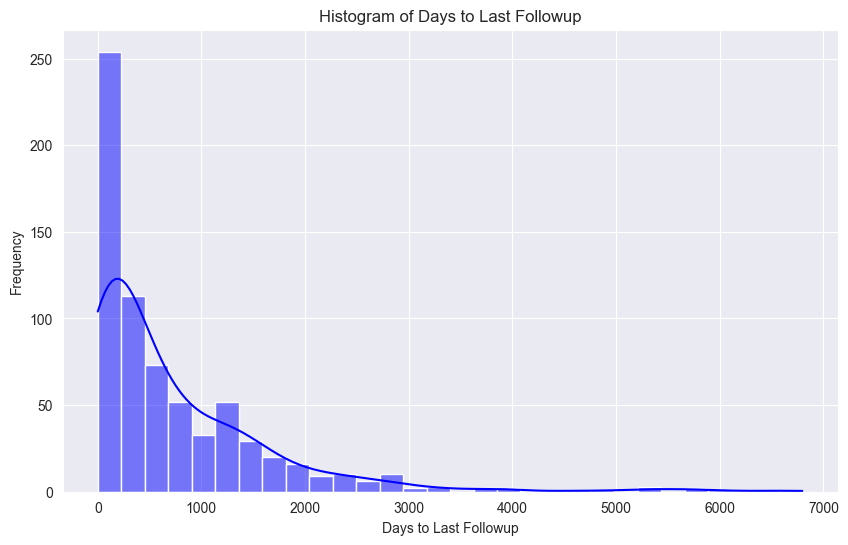

In [70]:
# Histogramma
plt.figure(figsize=(10, 6))
sns.histplot(data=clinical_followup_df, x='days_to_last_followup', bins=30, kde=True, color='blue')
plt.title('Histogram of Days to Last Followup')
plt.xlabel('Days to Last Followup')
plt.ylabel('Frequency')
plt.show()

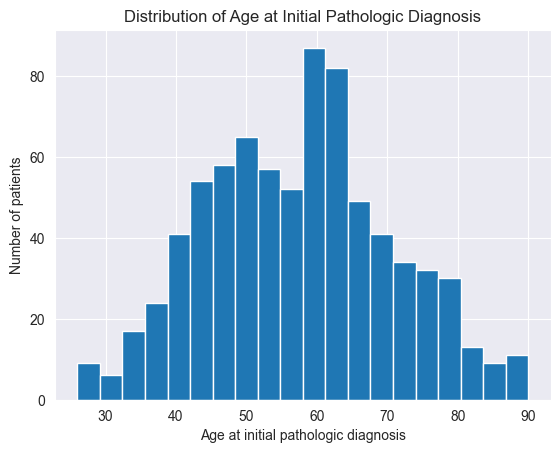

In [77]:
import matplotlib.pyplot as plt

plt.hist(clinical_followup_df['age_at_initial_pathologic_diagnosis'].dropna(), bins=20)
plt.xlabel('Age at initial pathologic diagnosis')
plt.ylabel('Number of patients')
plt.title('Distribution of Age at Initial Pathologic Diagnosis')
plt.show()

In [87]:
df = clinical_followup_df
df['days_to_last_followup']

0      1918.0
1      1309.0
2       238.0
3         0.0
4       212.0
        ...  
766     943.0
767      34.0
768       0.0
769    2221.0
770       NaN
Name: days_to_last_followup, Length: 771, dtype: float64

In [90]:
import pandas as pd

# Crea una nuova colonna con età raggruppata per decadi
df['age_group'] = pd.cut(
    df['age_at_initial_pathologic_diagnosis'],
    bins=range(0, 100, 10),
    right=False,
    labels=[f"{i}-{i+9}" for i in range(0, 90, 10)]
)


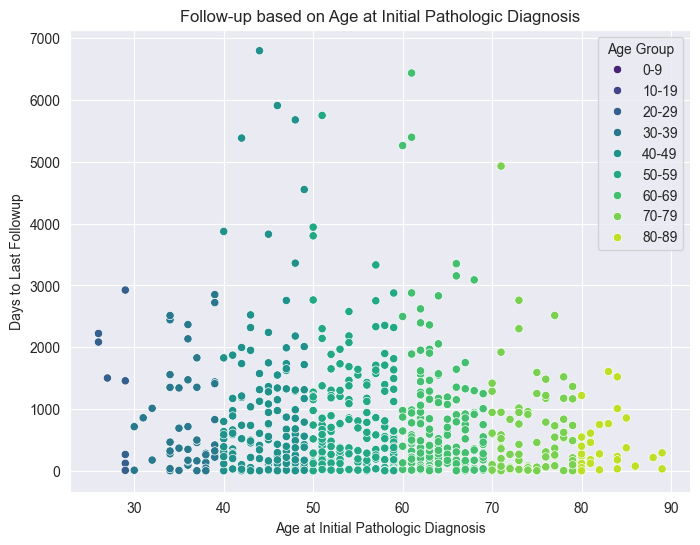

In [94]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='age_at_initial_pathologic_diagnosis',
    y='days_to_last_followup',
    hue='age_group',
    palette='viridis'
)
plt.title('Follow-up based on Age at Initial Pathologic Diagnosis')
plt.xlabel('Age at Initial Pathologic Diagnosis')
plt.ylabel('Days to Last Followup')
plt.legend(title='Age Group')
plt.show()


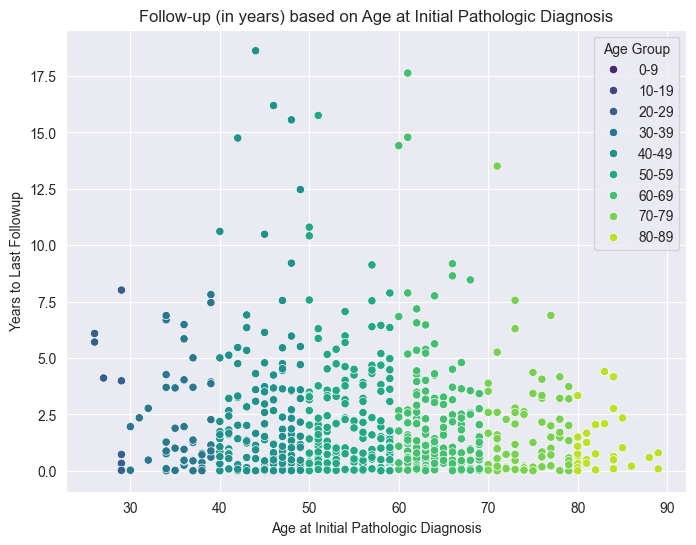

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea una nuova colonna con il follow-up in anni
df['followup_years'] = df['days_to_last_followup'] / 365

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='age_at_initial_pathologic_diagnosis',
    y='followup_years',
    hue='age_group',
    palette='viridis'
)

plt.title('Follow-up (in years) based on Age at Initial Pathologic Diagnosis')
plt.xlabel('Age at Initial Pathologic Diagnosis')
plt.ylabel('Years to Last Followup')
plt.legend(title='Age Group')
plt.show()


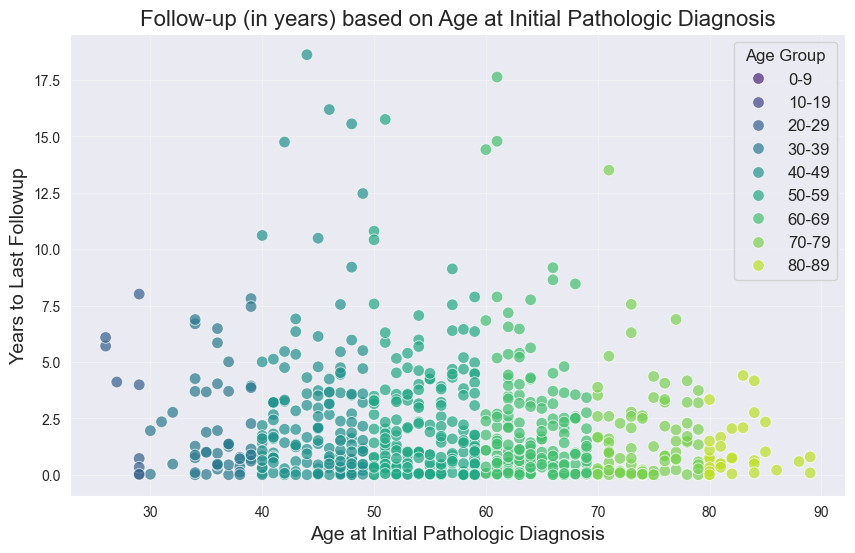

In [102]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x='age_at_initial_pathologic_diagnosis',
    y='followup_years',
    hue='age_group',
    palette='viridis',
    alpha=0.7,
    s=70
)
plt.title('Follow-up (in years) based on Age at Initial Pathologic Diagnosis', fontsize=16)
plt.xlabel('Age at Initial Pathologic Diagnosis', fontsize=14)
plt.ylabel('Years to Last Followup', fontsize=14)
plt.legend(title='Age Group', fontsize=12, title_fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()